In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

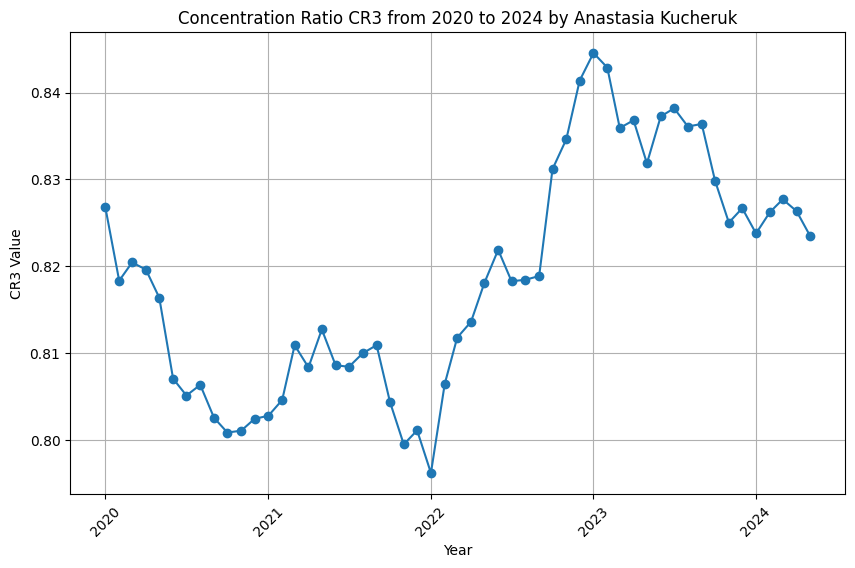

Значення CR3:
date
2020-01-01    0.826772
2020-02-01    0.818350
2020-03-01    0.820452
2020-04-01    0.819627
2020-05-01    0.816399
2020-06-01    0.807085
2020-07-01    0.805139
2020-08-01    0.806370
2020-09-01    0.802575
2020-10-01    0.800879
2020-11-01    0.801100
2020-12-01    0.802459
2021-01-01    0.802813
2021-02-01    0.804624
2021-03-01    0.810929
2021-04-01    0.808376
2021-05-01    0.812743
2021-06-01    0.808619
2021-07-01    0.808448
2021-08-01    0.810007
2021-09-01    0.810934
2021-10-01    0.804406
2021-11-01    0.799522
2021-12-01    0.801129
2022-01-01    0.796229
2022-02-01    0.806480
2022-03-01    0.811801
2022-04-01    0.813623
2022-05-01    0.818092
2022-06-01    0.821901
2022-07-01    0.818288
2022-08-01    0.818454
2022-09-01    0.818887
2022-10-01    0.831185
2022-11-01    0.834626
2022-12-01    0.841376
2023-01-01    0.844546
2023-02-01    0.842871
2023-03-01    0.835914
2023-04-01    0.836809
2023-05-01    0.831847
2023-06-01    0.837242
2023-07-01    0

In [2]:
def calc_and_plot_crn(path, n):
    df = pd.read_csv(path, header=0)
    df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
    crn_values = []
    for index, row in df.iterrows():
        sorted_assets = row[1:].sort_values(ascending=False)
        top_n_assets_sum = sorted_assets[:n].sum()
        total_assets = sorted_assets.sum()
        crn = top_n_assets_sum/ total_assets
        crn_values.append(crn)
    
    crn_series = pd.Series(crn_values, index=pd.to_datetime(df['date']))

    plt.figure(figsize=(10, 6))
    plt.plot(crn_series.index, crn_series.values, marker='o')
    plt.title(f'Concentration Ratio CR{n} from 2020 to 2024 by Anastasia Kucheruk')
    plt.xlabel('Year')
    plt.ylabel(f'CR{n} Value')
    xticks = [date for date in crn_series.index if date.month == 1]
    xtick_labels = [date.year for date in xticks]
    plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)
    plt.grid(True)
    plt.show()
    return crn_series

n = 3
crn_series = calc_and_plot_crn("data/original/total_assets.csv", n)
print(f'Значення CR{n}:\n{crn_series}')